<a href="https://colab.research.google.com/github/melihcelik09/NN-Dataset/blob/master/NN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [ ]:
csv_url="https://raw.githubusercontent.com/melihcelik09/NN-Dataset/master/ComputerPricesData.csv"

In [ ]:
data=pd.read_csv(csv_url)

# **About Dataset**
* price: The Price of the computer

* speed: The speed

* hd: How much hard drive is present

* ram: How much ram is present in the computer

* screen: The screen size

* cd: Whether CD player is present or not

* multi: Are there multiple ports or not

* premium: If the computer premium quality

* ads: The ads value of the computer

* trend: The trend value of the computer

In [ ]:
data.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [ ]:
data.shape

(6259, 10)

# **Data Check**

In [ ]:
data.isna().sum() if (data.isna().sum()).any()>0 else print("Data is Clean")

Data is Clean


In [ ]:
data.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [ ]:
e_data=data.copy()

# **Data Normalization with Label Encoder**

In [ ]:
lb=LabelEncoder()
need_transform=['cd',"multi","premium"]
for col in need_transform:
  e_data[col]=lb.fit_transform(e_data[col])
e_data

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,0,0,1,39,35
6255,2223,66,850,16,15,1,1,1,39,35
6256,2654,100,1200,24,15,1,0,1,39,35
6257,2195,100,850,16,15,1,0,1,39,35


In [ ]:
dataset=e_data.values

In [ ]:
dataset

array([[1499,   25,   80, ...,    1,   94,    1],
       [1795,   33,   85, ...,    1,   94,    1],
       [1595,   25,  170, ...,    1,   94,    1],
       ...,
       [2654,  100, 1200, ...,    1,   39,   35],
       [2195,  100,  850, ...,    1,   39,   35],
       [2490,  100,  850, ...,    1,   39,   35]])

# **Specifying input and output data**

In [ ]:
X=dataset[:,1:10]
Y=dataset[:,0]

In [ ]:
X

array([[  25,   80,    4, ...,    1,   94,    1],
       [  33,   85,    2, ...,    1,   94,    1],
       [  25,  170,    4, ...,    1,   94,    1],
       ...,
       [ 100, 1200,   24, ...,    1,   39,   35],
       [ 100,  850,   16, ...,    1,   39,   35],
       [ 100,  850,   16, ...,    1,   39,   35]])

In [ ]:
Y

array([1499, 1795, 1595, ..., 2654, 2195, 2490])

# **Data Normalization with MinMaxScaler**

In [ ]:
min_max_scaler=preprocessing.MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[0.        , 0.        , 0.06666667, ..., 1.        , 0.18333333,
        0.        ],
       [0.10666667, 0.00247525, 0.        , ..., 1.        , 0.18333333,
        0.        ],
       [0.        , 0.04455446, 0.06666667, ..., 1.        , 0.18333333,
        0.        ],
       ...,
       [1.        , 0.55445545, 0.73333333, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.38118812, 0.46666667, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.38118812, 0.46666667, ..., 1.        , 0.        ,
        1.        ]])

# **Data Split (Train,Test,Validat)**

In [ ]:
X_train,X_val_test,Y_train,Y_val_test=train_test_split(X_scale,Y,test_size=0.3,random_state=42)

In [ ]:
X_val,X_test,Y_val,Y_test=train_test_split(X_val_test,Y_val_test,test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(4381, 9) (939, 9) (939, 9) (4381,) (939,) (939,)


# **Building Neural Network Model**

In [ ]:
model=Sequential([
                  #Input Layer
                  Dense(32,activation="relu",input_shape=(9,)),
                  #Hidden Layer
                  Dense(32,activation="relu"),
                  #Output Layer
                  Dense(1),
                  ])
opt=keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss="mse",metrics=["mae","mse"])

# **Training Neural Network Model**

In [ ]:
hist = model.fit(
    X_train, 
    Y_train,
    epochs=20,
    validation_data=(X_val, Y_val))
model.summary()

Epoch 1/20
137/137 [==============================] - 2s 7ms/step - loss: 2287814.5000 - mae: 1223.2845 - mse: 2287814.5000 - val_loss: 341568.6875 - val_mae: 451.4913 - val_mse: 341568.6875
Epoch 2/20
137/137 [==============================] - 1s 4ms/step - loss: 307857.7500 - mae: 435.0638 - mse: 307857.7500 - val_loss: 231671.0000 - val_mae: 367.9602 - val_mse: 231671.0000
Epoch 3/20
137/137 [==============================] - 1s 7ms/step - loss: 225990.1719 - mae: 364.1483 - mse: 225990.1719 - val_loss: 172208.3906 - val_mae: 304.5268 - val_mse: 172208.3906
Epoch 4/20
137/137 [==============================] - 1s 6ms/step - loss: 168322.7812 - mae: 305.5373 - mse: 168322.7812 - val_loss: 127444.4766 - val_mae: 258.1058 - val_mse: 127444.4766
Epoch 5/20
137/137 [==============================] - 1s 5ms/step - loss: 127610.6094 - mae: 262.9125 - mse: 127610.6094 - val_loss: 100409.5703 - val_mae: 228.7764 - val_mse: 100409.5703
Epoch 6/20
137/137 [==============================] - 1s 

In [ ]:
#Evaluating data
model.evaluate(X_test,Y_test)

30/30 [==============================] - 0s 3ms/step - loss: 68793.0156 - mae: 193.0408 - mse: 68793.0156


[68793.015625, 193.04075622558594, 68793.015625]

In [ ]:
#We selected first 5 test datas for predict.
X_new=X_test[:5]
X_new

array([[0.54666667, 0.08168317, 0.06666667, 0.        , 1.        ,
        0.        , 0.        , 0.59      , 0.35294118],
       [0.10666667, 0.22178218, 0.2       , 0.        , 1.        ,
        0.        , 1.        , 0.69666667, 0.55882353],
       [0.        , 0.04455446, 0.06666667, 0.        , 0.        ,
        0.        , 1.        , 0.23      , 0.08823529],
       [0.33333333, 0.04455446, 0.06666667, 0.        , 0.        ,
        0.        , 1.        , 0.23      , 0.08823529],
       [0.        , 0.01980198, 0.06666667, 0.        , 1.        ,
        0.        , 0.        , 0.78666667, 0.32352941]])

# **Predict Prices using NN model**

In [ ]:
y_pred=model.predict(X_new)
print(f"Predicted values :\n{y_pred}")
real_values=Y_test[:5]
print(f"\nReal values :\n{real_values}")

Predicted values :
[[2563.855 ]
 [1878.9784]
 [1848.3774]
 [2079.8284]
 [2024.4852]]

Real values :
[2924 2094 1399 2025 1804]


In [ ]:
print(f"Mean Absolute Error: {metrics.mean_absolute_error(real_values,y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(real_values,y_pred)}")
print(f"Variance Score is: {metrics.explained_variance_score(real_values,y_pred)}")

Mean Absolute Error: 259.971533203125
Mean Squared Error: 85899.73953263163
Variance Score is: 0.6601823580020805


# **Visualizing Predicted and Real Prices**

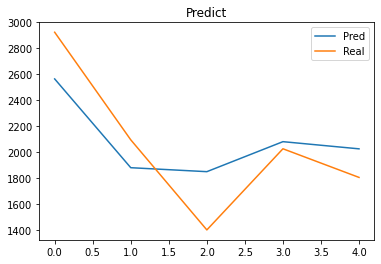

In [ ]:
plt.plot(y_pred)
plt.plot(real_values)
plt.title('Predict')
plt.legend(['Pred', 'Real'], loc='upper right')
plt.show()

In [ ]:
full_pred=model.predict(X_test)

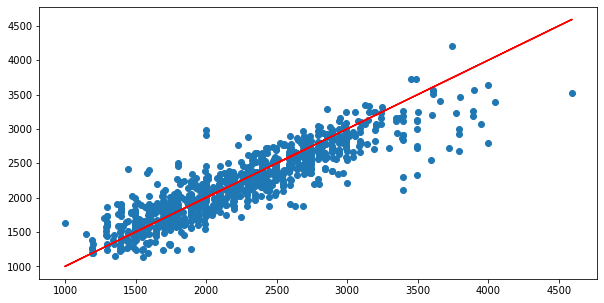

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.scatter(Y_test,full_pred)
plt.plot(Y_test,Y_test,"r")

# **Visualizing Residuals**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '')

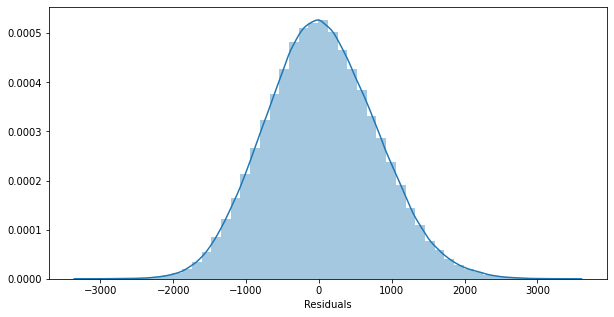

In [ ]:
fig=plt.figure(figsize=(10,5))
residuals=(Y_test-full_pred)
ax=sns.distplot(residuals)
ax.set_xlabel("Residuals")
ax.set_ylabel("")

# **Visualizing Loss,Mean Absolute Error and Mean Squared Error**

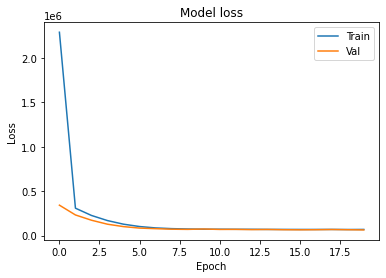

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

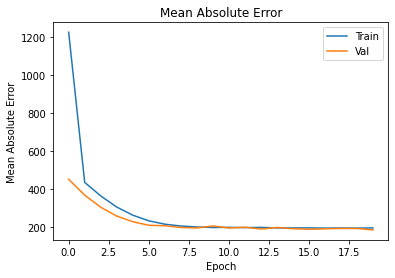

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

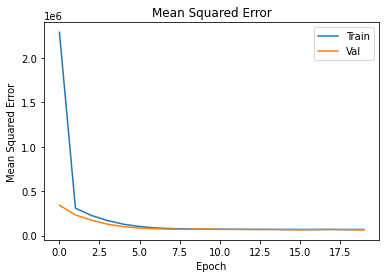

In [ ]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()